In [2]:
from statsbombpy import sb
import mplsoccer

import pandas as pd
import numpy as np
import math
import ast
import sklearn


import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
data = pd.read_csv('D:/Football_data_scientist/data/ISL_shots_added_features.csv')
data2 = pd.read_csv('D:/Football_data_scientist/data/LaLiga_20_21_shots_added_features.csv')
data3 = pd.read_csv('D:/Football_data_scientist/data/LaLiga_19_20_shots_added_features.csv')
data4 = pd.read_csv('D:/Football_data_scientist/data/Euro_2020_shots_added_features.csv')
data5 = pd.read_csv('D:/Football_data_scientist/data/Fifa_2022_shots_added_features.csv')

In [4]:
merged_data = pd.concat([data,data2,data3,data4,data5])

In [5]:
merged_data

,Unnamed: 0,level_0,id,index,play_pattern,location,shot,possession_team,type,outcome,...,players,home_team,follows_dribble,teammates_in_box,teammates_ahead,opp_in_box,gk_dist_from_goal,gk_x,gk_y,opponents_near
0,0,2056,41c752ca-0121-4090-a8c1-685a10fa057e,2057,"{'id': 1, 'name': 'Regular Play'}","[106.7, 48.5]","{'statsbomb_xg': 0.09305495, 'end_location': [...","{'id': 7289, 'name': 'Hyderabad'}",Open Play,Off T,...,"[{'location': [117.2, 42.2], 'player': {'id': ...",1,0,1,0,3,3.560899,117.2,42.2,1
1,1,2263,a10836e8-28f3-4ab4-b250-1dec9756559b,2264,"{'id': 1, 'name': 'Regular Play'}","[102.2, 47.3]","{'statsbomb_xg': 0.053034723000000006, 'end_lo...","{'id': 7289, 'name': 'Hyderabad'}",Open Play,Saved,...,"[{'location': [106.6, 38.0], 'player': {'id': ...",1,0,2,2,4,1.931321,119.3,41.8,1
2,2,2447,eadaaccd-319b-4275-af68-47701b7c2433,2448,"{'id': 1, 'name': 'Regular Play'}","[99.0, 51.6]","{'statsbomb_xg': 0.061114587000000005, 'end_lo...","{'id': 7283, 'name': 'Kerala Blasters'}",Open Play,Goal,...,"[{'location': [117.9, 41.9], 'player': {'id': ...",0,0,1,2,3,2.831960,117.9,41.9,0
3,3,2752,48885ba4-54e3-4504-afd3-8941e149497b,2753,"{'id': 1, 'name': 'Regular Play'}","[101.1, 24.4]","{'statsbomb_xg': 0.03049218, 'end_location': [...","{'id': 7283, 'name': 'Kerala Blasters'}",Open Play,Saved,...,"[{'location': [105.1, 44.4], 'player': {'id': ...",0,0,1,1,4,2.941088,118.3,37.6,1
4,4,3091,c3afd07a-30a8-4130-abb4-0d52ffc4db74,3092,"{'id': 1, 'name': 'Regular Play'}","[103.0, 51.4]","{'statsbomb_xg': 0.056751974000000004, 'end_lo...","{'id': 7283, 'name': 'Kerala Blasters'}",Open Play,Blocked,...,"[{'location': [100.6, 46.4], 'player': {'id': ...",0,0,3,3,6,2.202272,118.3,41.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5,2475,7a8d09b4-e1da-4112-a8fc-6784cf2029a4,2476,"{'id': 1, 'name': 'Regular Play'}","[100.5, 55.8]","{'statsbomb_xg': 0.027777622000000002, 'end_lo...","{'id': 778, 'name': 'Japan'}",Open Play,Goal,...,"[{'location': [107.5, 54.3], 'player': {'id': ...",1,0,2,2,5,2.900000,118.0,42.1,0
446,6,3912,ef2acb37-fc25-440c-9a5d-88a9cffa5d48,3913,"{'id': 1, 'name': 'Regular Play'}","[96.8, 52.1]","{'statsbomb_xg': 0.02842248, 'end_location': [...","{'id': 772, 'name': 'Spain'}",Open Play,Blocked,...,"[{'location': [118.6, 41.6], 'player': {'id': ...",0,0,3,6,7,2.126029,118.6,41.6,1
447,0,182,e6b6a9b1-6174-4c55-98b7-dd219e256299,183,"{'id': 1, 'name': 'Regular Play'}","[114.0, 54.8]","{'statsbomb_xg': 0.014059674000000001, 'end_lo...","{'id': 777, 'name': 'Tunisia'}",Open Play,Blocked,...,"[{'location': [107.0, 49.4], 'player': {'id': ...",0,0,4,1,8,3.956008,118.9,43.8,0
448,1,3076,a0ccad21-8e44-4a4f-ad5e-0eae6a6fcbc2,3077,"{'id': 1, 'name': 'Regular Play'}","[102.5, 24.2]","{'statsbomb_xg': 0.02872357, 'end_location': [...","{'id': 776, 'name': 'Denmark'}",Open Play,Off T,...,"[{'location': [107.0, 35.5], 'player': {'id': ...",1,0,3,3,7,1.664332,118.6,39.1,2


In [6]:
merged_data.columns

Index(['Unnamed: 0', 'level_0', 'id', 'index', 'play_pattern', 'location',
       'shot', 'possession_team', 'type', 'outcome', 'body_part', 'players',
       'home_team', 'follows_dribble', 'teammates_in_box', 'teammates_ahead',
       'opp_in_box', 'gk_dist_from_goal', 'gk_x', 'gk_y', 'opponents_near'],
      dtype='object')

In [7]:
#filter data to get only open play shots which are not headers
merged_data = merged_data[(merged_data['type']=='Open Play') & (merged_data['body_part']!='Head')]

In [8]:
#for the base model, we will use only distance from goal and angle as seen by the player
data1 = merged_data[['location','outcome','home_team', 'follows_dribble', 'teammates_in_box', 'teammates_ahead',
       'opp_in_box', 'gk_dist_from_goal', 'gk_x', 'gk_y', 'opponents_near']].reset_index(drop=True)

In [9]:
data1

,location,outcome,home_team,follows_dribble,teammates_in_box,teammates_ahead,opp_in_box,gk_dist_from_goal,gk_x,gk_y,opponents_near
0,"[106.7, 48.5]",Off T,1,0,1,0,3,3.560899,117.2,42.2,1
1,"[102.2, 47.3]",Saved,1,0,2,2,4,1.931321,119.3,41.8,1
2,"[99.0, 51.6]",Goal,0,0,1,2,3,2.831960,117.9,41.9,0
3,"[101.1, 24.4]",Saved,0,0,1,1,4,2.941088,118.3,37.6,1
4,"[103.0, 51.4]",Blocked,0,0,3,3,6,2.202272,118.3,41.4,0
...,...,...,...,...,...,...,...,...,...,...,...
2171,"[100.5, 55.8]",Goal,1,0,2,2,5,2.900000,118.0,42.1,0
2172,"[96.8, 52.1]",Blocked,0,0,3,6,7,2.126029,118.6,41.6,1
2173,"[114.0, 54.8]",Blocked,0,0,4,1,8,3.956008,118.9,43.8,0
2174,"[102.5, 24.2]",Off T,1,0,3,3,7,1.664332,118.6,39.1,2


In [10]:
data1['outcome'] = np.where(data1['outcome']=='Goal',1,0)

In [11]:
data1['location'] = data1.apply(lambda x : ast.literal_eval(x['location']) ,axis=1 )
data1['x'] = data1.apply(lambda x: x['location'][0],axis=1)
data1['y'] = data1.apply(lambda x: x['location'][1],axis=1)

In [12]:
data1

,location,outcome,home_team,follows_dribble,teammates_in_box,teammates_ahead,opp_in_box,gk_dist_from_goal,gk_x,gk_y,opponents_near,x,y
0,"[106.7, 48.5]",0,1,0,1,0,3,3.560899,117.2,42.2,1,106.7,48.5
1,"[102.2, 47.3]",0,1,0,2,2,4,1.931321,119.3,41.8,1,102.2,47.3
2,"[99.0, 51.6]",1,0,0,1,2,3,2.831960,117.9,41.9,0,99.0,51.6
3,"[101.1, 24.4]",0,0,0,1,1,4,2.941088,118.3,37.6,1,101.1,24.4
4,"[103.0, 51.4]",0,0,0,3,3,6,2.202272,118.3,41.4,0,103.0,51.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,"[100.5, 55.8]",1,1,0,2,2,5,2.900000,118.0,42.1,0,100.5,55.8
2172,"[96.8, 52.1]",0,0,0,3,6,7,2.126029,118.6,41.6,1,96.8,52.1
2173,"[114.0, 54.8]",0,0,0,4,1,8,3.956008,118.9,43.8,0,114.0,54.8
2174,"[102.5, 24.2]",0,1,0,3,3,7,1.664332,118.6,39.1,2,102.5,24.2


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           2176 non-null   object 
 1   outcome            2176 non-null   int32  
 2   home_team          2176 non-null   int64  
 3   follows_dribble    2176 non-null   int64  
 4   teammates_in_box   2176 non-null   int64  
 5   teammates_ahead    2176 non-null   int64  
 6   opp_in_box         2176 non-null   int64  
 7   gk_dist_from_goal  2175 non-null   float64
 8   gk_x               2175 non-null   float64
 9   gk_y               2175 non-null   float64
 10  opponents_near     2176 non-null   int64  
 11  x                  2176 non-null   float64
 12  y                  2176 non-null   float64
dtypes: float64(5), int32(1), int64(6), object(1)
memory usage: 212.6+ KB


In [14]:
data1.describe()

,outcome,home_team,follows_dribble,teammates_in_box,teammates_ahead,opp_in_box,gk_dist_from_goal,gk_x,gk_y,opponents_near,x,y
count,2176.000000,2176.000000,2176.0,2176.000000,2176.000000,2176.000000,2175.000000,2175.000000,2175.000000,2176.000000,2176.000000,2176.000000
mean,0.105699,0.509651,0.0,1.931066,2.123621,4.223346,3.759809,117.203954,39.911862,0.423254,102.512224,39.708502
std,0.307522,0.500022,0.0,1.365866,1.706209,2.184739,2.809143,2.480493,2.837581,0.581391,8.442670,10.383362
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.300000,55.300000,16.900000,0.000000,56.700000,4.000000
25%,0.000000,0.000000,0.0,1.000000,1.000000,3.000000,2.408319,116.800000,38.200000,0.000000,97.100000,30.975000
50%,0.000000,1.000000,0.0,2.000000,2.000000,4.000000,3.301515,117.700000,39.900000,0.000000,103.100000,39.800000
75%,0.000000,1.000000,0.0,3.000000,3.000000,6.000000,4.256172,118.300000,41.700000,1.000000,108.800000,48.300000
max,1.000000,1.000000,0.0,6.000000,8.000000,9.000000,64.764960,120.000000,51.600000,3.000000,119.300000,79.600000


In [15]:
data1.outcome.value_counts()

0    1946
1     230
Name: outcome, dtype: int64

In [16]:
# creating the distance and angle columns
data1['distance'] = np.sqrt((120-data1['x'])**2 + (40-data1['y'])**2)
# to make sure angle is always positive we add pi where its less than 0
data1['angle'] = np.where(np.arctan((8*(120 - data1['x']))/((120- data1['x'])**2 +((40 - data1['y'])**2) - 16))>0,np.arctan((8*(120 - data1['x']))/((120- data1['x'])**2 +((40 - data1['y'])**2) - 16)), np.arctan((8*(120 - data1['x']))/((120- data1['x'])**2 +((40 - data1['y'])**2) - 16)) + np.pi)
#converting to degrees for better interpretebility
data1['angle'] = data1['angle']*180/np.pi                       

In [17]:
data1.describe()

,outcome,home_team,follows_dribble,teammates_in_box,teammates_ahead,opp_in_box,gk_dist_from_goal,gk_x,gk_y,opponents_near,x,y,distance,angle
count,2176.000000,2176.000000,2176.0,2176.000000,2176.000000,2176.000000,2175.000000,2175.000000,2175.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,0.105699,0.509651,0.0,1.931066,2.123621,4.223346,3.759809,117.203954,39.911862,0.423254,102.512224,39.708502,20.507121,21.858680
std,0.307522,0.500022,0.0,1.365866,1.706209,2.184739,2.809143,2.480493,2.837581,0.581391,8.442670,10.383362,8.025300,12.051406
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.300000,55.300000,16.900000,0.000000,56.700000,4.000000,2.596151,2.614243
25%,0.000000,0.000000,0.0,1.000000,1.000000,3.000000,2.408319,116.800000,38.200000,0.000000,97.100000,30.975000,14.973392,14.981118
50%,0.000000,1.000000,0.0,2.000000,2.000000,4.000000,3.301515,117.700000,39.900000,0.000000,103.100000,39.800000,19.973479,18.574917
75%,0.000000,1.000000,0.0,3.000000,3.000000,6.000000,4.256172,118.300000,41.700000,1.000000,108.800000,48.300000,25.389959,24.470739
max,1.000000,1.000000,0.0,6.000000,8.000000,9.000000,64.764960,120.000000,51.600000,3.000000,119.300000,79.600000,70.830784,148.836481


<AxesSubplot:xlabel='distance', ylabel='Count'>

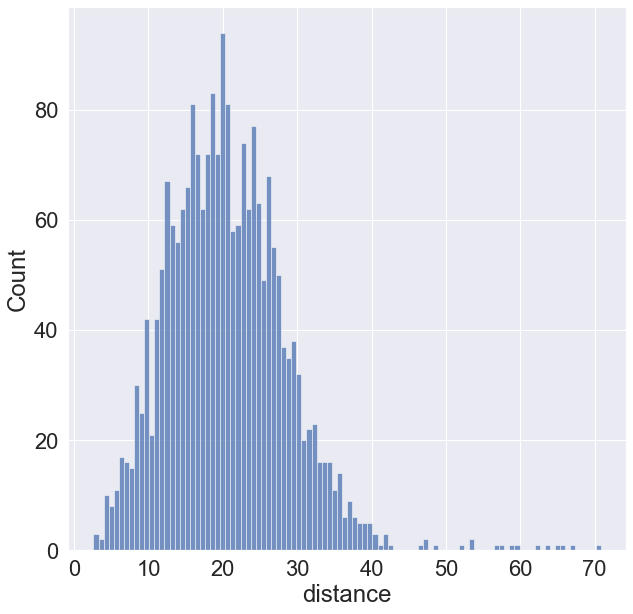

In [18]:
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.histplot(data=data1, x='distance' , bins=100 )

<AxesSubplot:xlabel='angle', ylabel='Count'>

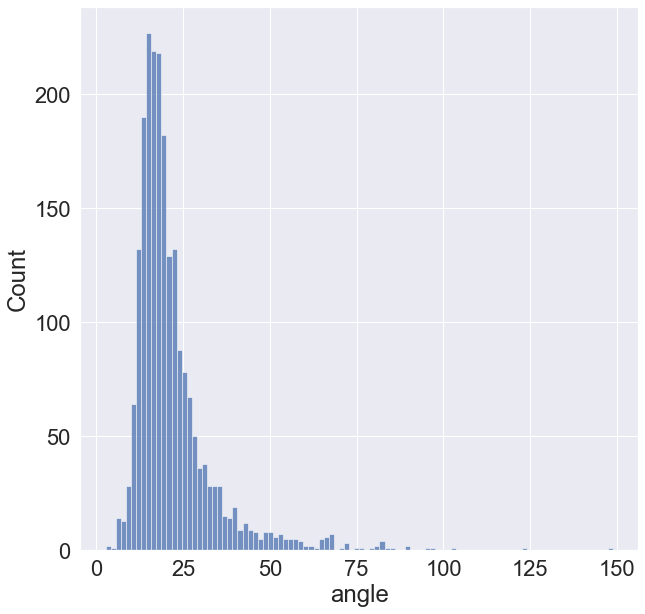

In [19]:
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.histplot(data=data1, x='angle' , bins=100 )

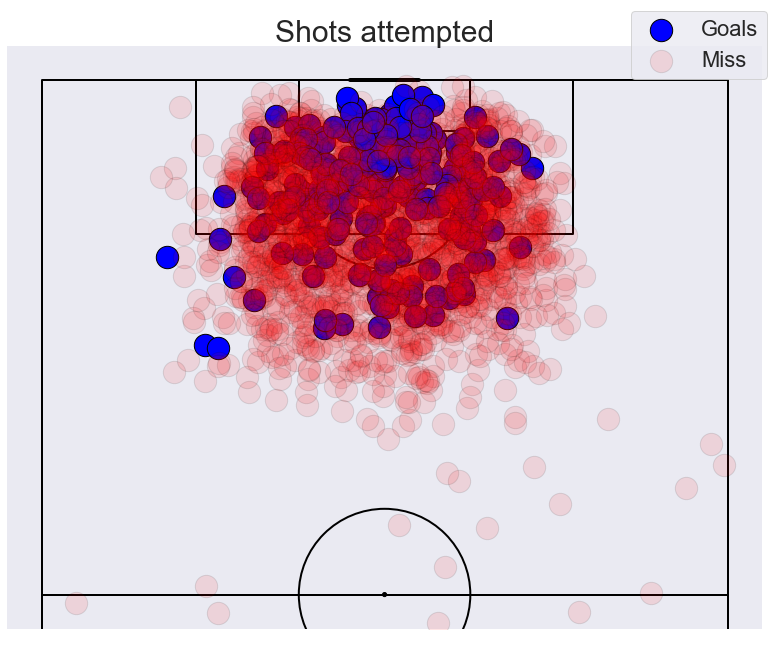

In [20]:
from mplsoccer import VerticalPitch
goals = data1[data1['outcome']==1]
shots = data1[data1['outcome']!=1]

pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(goals.x, goals.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'], edgecolors="black",label = 'Goals')
pitch.scatter(shots.x, shots.y, alpha = 0.1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black",label= 'Miss')

fig.suptitle("Shots attempted", fontsize = 30)
fig.legend(loc="upper right")


plt.show()

In [21]:
data1.columns

Index(['location', 'outcome', 'home_team', 'follows_dribble',
       'teammates_in_box', 'teammates_ahead', 'opp_in_box',
       'gk_dist_from_goal', 'gk_x', 'gk_y', 'opponents_near', 'x', 'y',
       'distance', 'angle'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1[['home_team', 'teammates_in_box', 'teammates_ahead',
                                    'opp_in_box','gk_dist_from_goal','opponents_near','distance', 'angle']],
                                    data1['outcome'], test_size=.2,random_state=42,stratify=data1['outcome'])

In [39]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

params = {
        "n_estimators": [100,150,200,1000],
        'max_depth': [3,4,5,6,7]
        }

xgb = XGBClassifier(learning_rate=0.02 , random_state=42)

skf = StratifiedKFold(n_splits=6, shuffle = True, random_state = 42)

grid_search = GridSearchCV(xgb, param_grid=params,  scoring='f1', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3)

grid_search.fit(X_train,y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits
[12:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001AC530A8B30>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,


In [41]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.28779128672745696
{'max_depth': 5, 'n_estimators': 1000}


In [42]:
probs  = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, probs)
roc_auc = sklearn.metrics.auc(fpr, tpr)

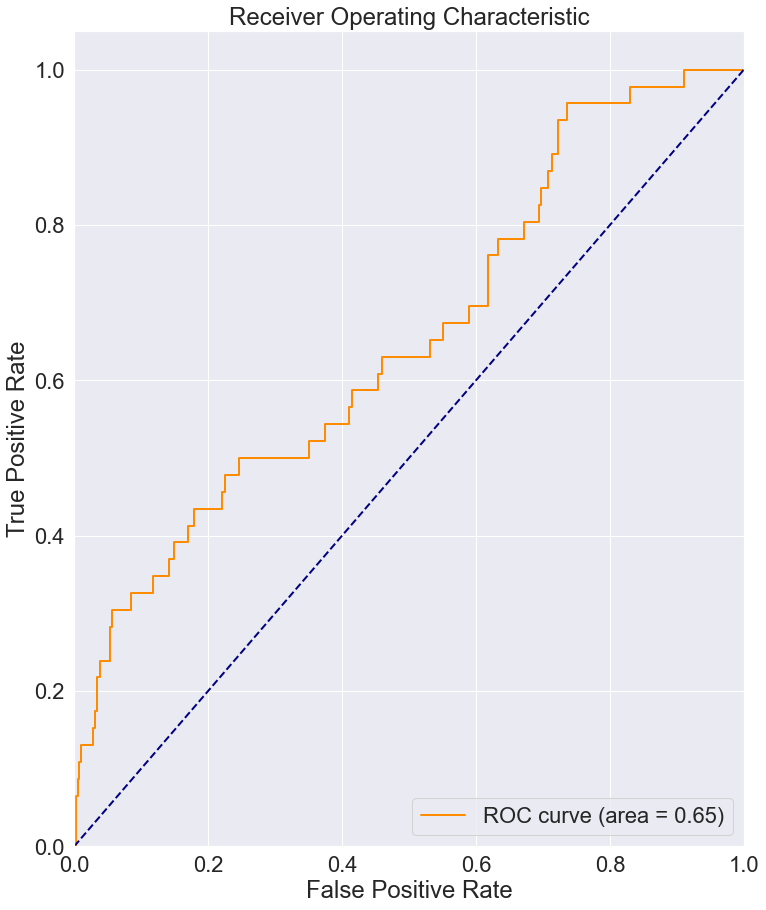

In [43]:
# Plot ROC curve 
plt.figure(figsize=(12,15)) 
  
# Plot the ROC curve with a label displaying the ROC AUC score 
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc) 
  
# Plot a dashed diagonal line for reference 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
  
# Set the x and y-axis limits 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
  
# Label the x and y-axes 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
  
# Set the title of the plot 
plt.title('Receiver Operating Characteristic') 
  
# Add a legend to the plot 
plt.legend(loc='lower right') 
  
# Display the ROC curve plot 
plt.show()

In [35]:
def f_1_score(threshold,y_test=y_test,probs=probs):
    preds = np.where(probs>threshold,1,0)
    from sklearn.metrics import f1_score
    return f1_score(y_test,preds)

In [36]:
thresholds = sorted(threshold,reverse=True,key = f_1_score)

In [37]:
for i in range(5):
    preds = np.where(probs>thresholds[i],1,0)
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 

    cm = confusion_matrix(y_test, preds) 
    # Accuracy 
    accuracy = accuracy_score(y_test, preds) 
    # Precision 
    precision = precision_score(y_test, preds) 
    # Recall 
    recall = recall_score(y_test, preds) 
    # F1-Score 
    f1 = f1_score(y_test, preds) 


    print("Confusion Matrix:") 
    print(cm) 
    print("Accuracy:", accuracy) 
    print("Precision:", precision) 
    print("Recall:", recall) 
    print("F1-Score:", f1) 
    print()
    print('-'*50)
    print()


Confusion Matrix:
[[357  33]
 [ 31  15]]
Accuracy: 0.8532110091743119
Precision: 0.3125
Recall: 0.32608695652173914
F1-Score: 0.3191489361702128

--------------------------------------------------

Confusion Matrix:
[[356  34]
 [ 31  15]]
Accuracy: 0.8509174311926605
Precision: 0.30612244897959184
Recall: 0.32608695652173914
F1-Score: 0.3157894736842105

--------------------------------------------------

Confusion Matrix:
[[360  30]
 [ 32  14]]
Accuracy: 0.8577981651376146
Precision: 0.3181818181818182
Recall: 0.30434782608695654
F1-Score: 0.31111111111111117

--------------------------------------------------

Confusion Matrix:
[[348  42]
 [ 30  16]]
Accuracy: 0.8348623853211009
Precision: 0.27586206896551724
Recall: 0.34782608695652173
F1-Score: 0.3076923076923077

--------------------------------------------------

Confusion Matrix:
[[347  43]
 [ 30  16]]
Accuracy: 0.8325688073394495
Precision: 0.2711864406779661
Recall: 0.34782608695652173
F1-Score: 0.3047619047619048

-----------

In [ ]:
def f_1_score(threshold,y_test=y_test,probs=probs):
    preds = np.where(probs>threshold,1,0)
    from sklearn.metrics import f1_score
    return f1_score(y_test,preds)

thresholds = sorted(threshold,reverse=True,key = f_1_score)

for i in range(5):
    preds = np.where(probs>thresholds[i],1,0)
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 

    cm = confusion_matrix(y_test, preds) 
    # Accuracy 
    accuracy = accuracy_score(y_test, preds) 
    # Precision 
    precision = precision_score(y_test, preds) 
    # Recall 
    recall = recall_score(y_test, preds) 
    # F1-Score 
    f1 = f1_score(y_test, preds) 


    print("Confusion Matrix:") 
    print(cm) 
    print("Accuracy:", accuracy) 
    print("Precision:", precision) 
    print("Recall:", recall) 
    print("F1-Score:", f1) 
    print()
    print('-'*50)
    print()


